In [14]:
import os
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the CSV file containing bounding box information
csv_file = r"C:\Users\Admin\Documents\rsna-pneumonia-detection-challenge\stage_2_train_labels.csv"
csv_file_detailed = r"C:\Users\Admin\Documents\rsna-pneumonia-detection-challenge\stage_2_detailed_class_info.csv"

df = pd.read_csv(csv_file)
df_detailed = pd.read_csv(csv_file_detailed)

# DICOM image folder path
dcm_folder = r'C:\Users\Admin\Documents\rsna-pneumonia-detection-challenge\stage_2_train_images'


# Filter the rows where Target == 1 (indicating pneumonia with bounding boxes)
pneumonia_df = df[df['Target'] == 1]
no_pneumonia_df = df[df['Target'] == 0]
no_pneumonia_sick_df = df_detailed[df_detailed['class'] == 'No Lung Opacity / Not Normal']


# Count the number of unique patient IDs with pneumonia
num_pneumonia_images = pneumonia_df['patientId'].nunique()
num_no_pneumonia_images = no_pneumonia_df['patientId'].nunique()
num_no_pneumonia_images_sick = no_pneumonia_sick_df['patientId'].nunique()
num_no_pneumonia_images_healthy = num_no_pneumonia_images - num_no_pneumonia_images_sick

# Print the result
print(f'Number of images with pneumonia and bounding boxes: {num_pneumonia_images}')
print(f'Number of images with no pneumonia: {num_no_pneumonia_images}')
print(f'Number of images with no pneumonia but sick: {num_no_pneumonia_images_sick}')
print(f'Number of images with no pneumonia but healthy: {num_no_pneumonia_images_healthy}')








Number of images with pneumonia and bounding boxes: 6012
Number of images with no pneumonia: 20672
Number of images with no pneumonia but sick: 11821
Number of images with no pneumonia but healthy: 8851


In [ ]:
# Function to draw bounding boxes on image
def draw_bounding_box(image, bbox):
    draw = ImageDraw.Draw(image)
    x, y, width, height = bbox
    draw.rectangle([x, y, x + width, y + height], outline="red", width=3)
    return image

# Group the data by patientId
grouped = df.groupby('patientId')

display_count = 0


for patient_id, group in list(grouped)[:5]:
    
    # Load the DICOM image
    dcm_file = os.path.join(dcm_folder, f'{patient_id}.dcm')
    dcm_data = pydicom.dcmread(dcm_file)
    
    # Convert DICOM pixel data to a PIL image
    img = Image.fromarray(dcm_data.pixel_array)
    
    # Loop through all rows for this patientId (because there might be multiple bounding boxes)
    for index, row in group.iterrows():
        if row['Target'] == 1:
            bbox = [row['x'], row['y'], row['width'], row['height']]
            img = draw_bounding_box(img, bbox)
    
    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(f'Patient ID: {patient_id}')
    plt.axis('off')
    plt.show()

    display_count += 1
    if display_count >= 5:
        break


Using cache found in C:\Users\Admin/.cache\torch\hub\B-cos_B-cos-v2_main
Using cache found in C:\Users\Admin/.cache\torch\hub\B-cos_B-cos-v2_main


Prediction: 844


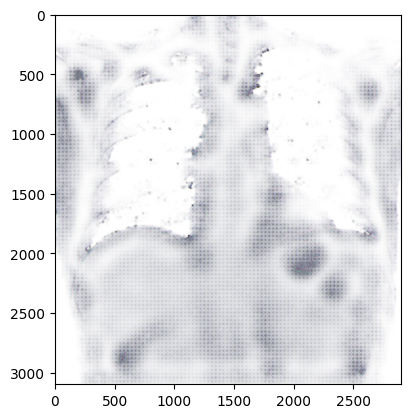

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


# list all available models
torch.hub.list('B-cos/B-cos-v2')

# load a pretrained model
model = torch.hub.load('B-cos/B-cos-v2', 'resnet50', pretrained=True)

# load image
img_path = "output_image.png"
img = Image.open(img_path).convert("RGB")  # Convert to RGB to ensure 3 channels

# Convert to a tensor and, if needed, expand to the required number of channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Adjust mean and std if needed
])

img_tensor = transform(img).unsqueeze(0)  # Shape: [1, 3, H, W]

# If the model needs 6 channels, repeat the channels as necessary
img_tensor_expanded = img_tensor.repeat(1, 2, 1, 1)  # Shape: [1, 6, H, W]

img_tensor_expanded.requires_grad_()

# predict and explain
model.eval()
expl_out = model.explain(img_tensor_expanded)
print("Prediction:", expl_out["prediction"])  # predicted class idx
plt.imshow(expl_out["explanation"])
plt.show()



Displaying: 0100515c-5204-4f31-98e0-f35e4b00004a_explanation.png


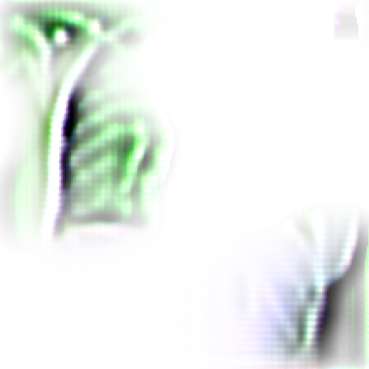

Displaying: 01adfd2f-7bc7-4cef-ab68-a0992752b620_explanation.png


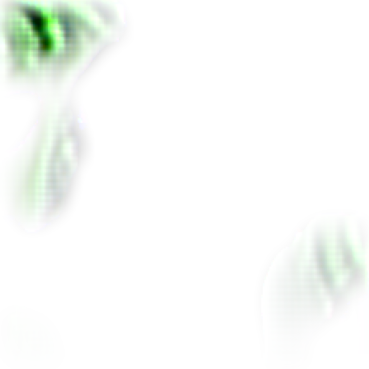

Displaying: 03ae75b6-45a7-4a68-9871-f07b82b17bf6_explanation.png


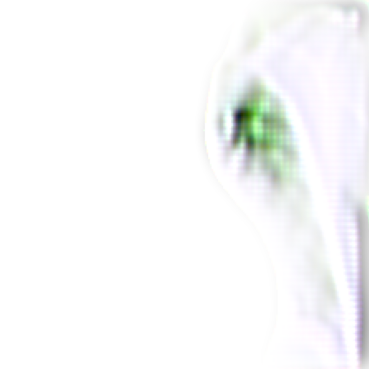

Displaying: 04dd9347-6215-4b34-a98f-a73e577aff9d_explanation.png


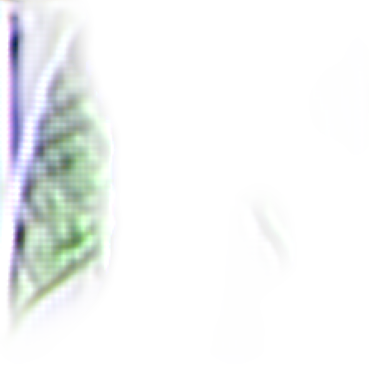

Displaying: 051e6e97-fda7-4b5c-8d5f-084bf3607d22_explanation.png


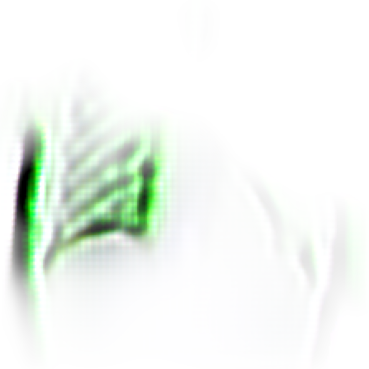

Displaying: 05dad446-45f7-44df-bd2f-4673d9502348_explanation.png


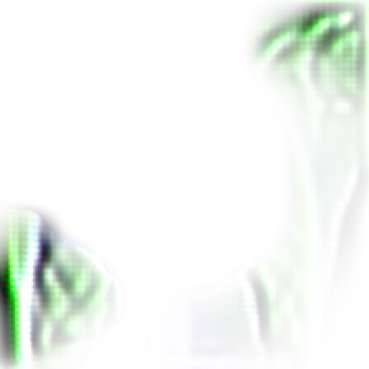

Displaying: 061b44ff-fd22-473d-853f-81da70e14a63_explanation.png


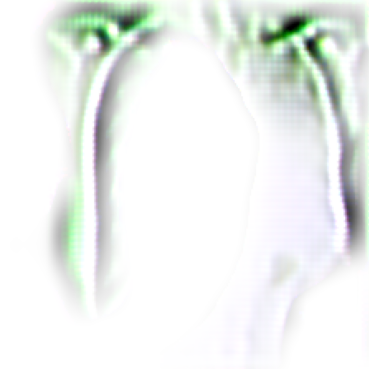

Displaying: 06ac3c8c-cd1f-4e10-ac24-4cb4f3ab1243_explanation.png


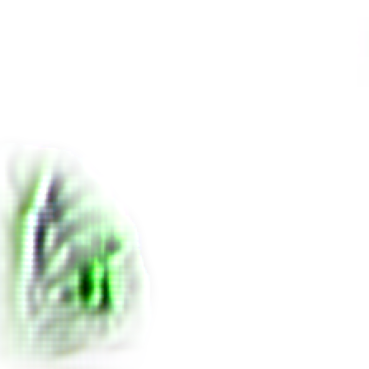

Displaying: 06c50ad5-8ffd-480b-8424-dd38df7ca86c_explanation.png


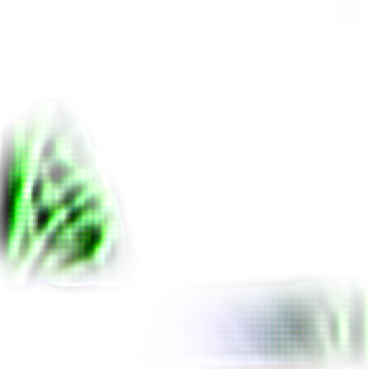

Displaying: 06fc2885-127a-4274-b20c-554d352ea21b_explanation.png


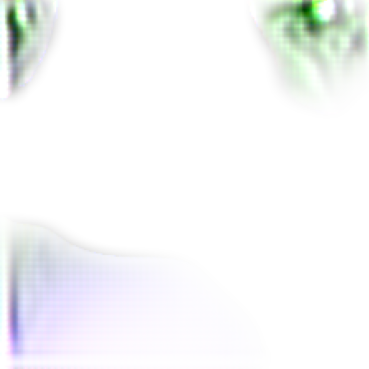

Displaying: 07a35aa8-491e-49f2-a9a3-13df10f32484_explanation.png


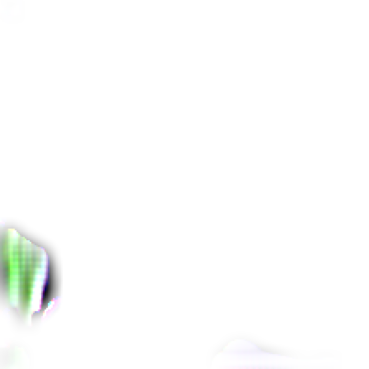

Displaying: 084d42b9-0a43-490d-9a8d-e4d7545c44f5_explanation.png


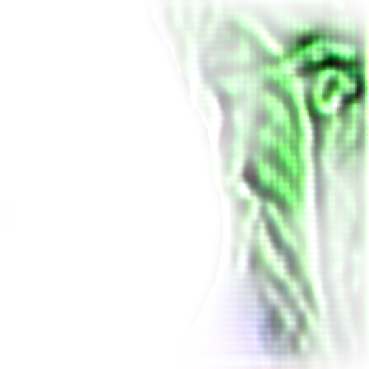

Displaying: 087bcaa5-2477-4111-8390-fa5f2dec4852_explanation.png


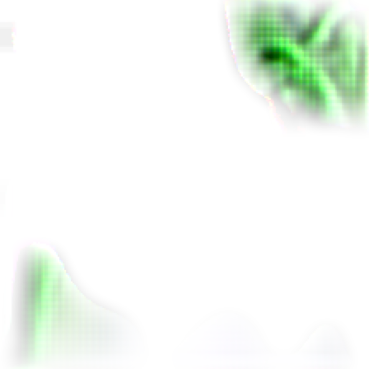

Displaying: 0902e0fc-fcf3-40b5-ac04-c3ecc14c2355_explanation.png


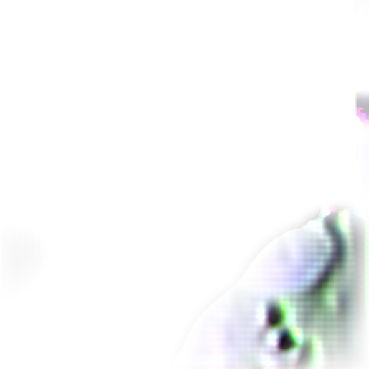

Displaying: 0927e819-9640-487d-a04e-f5d4732dbe0a_explanation.png


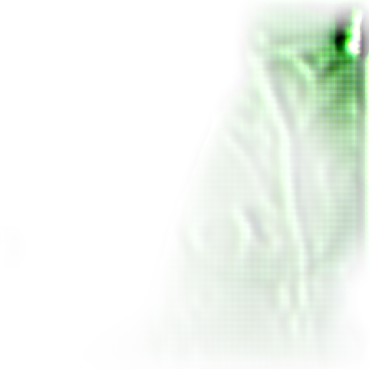

Displaying: 0930b0aa-25c2-4624-a3fc-9b60ba0b23f4_explanation.png


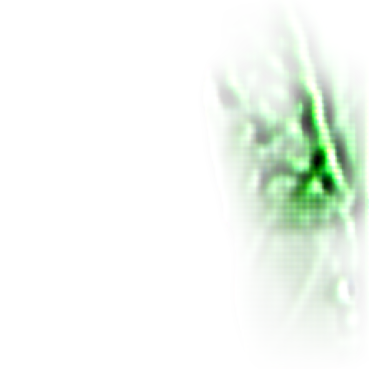

Displaying: 0949d712-9d3c-424a-99b5-423a598d8b97_explanation.png


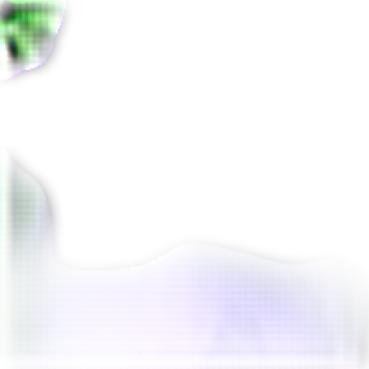

In [3]:
import os
from IPython.display import display
from PIL import Image

def display_images_in_notebook(directory):
    # Supported image file extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

    try:
        # Loop through all files in the directory
        for filename in os.listdir(directory):
            # Get the file extension in lowercase
            _, extension = os.path.splitext(filename)
            extension = extension.lower()

            # Check if the file is an image
            if extension in image_extensions:
                image_path = os.path.join(directory, filename)
                
                # Open the image
                img = Image.open(image_path)
                
                # Display the image inline in the notebook
                print(f"Displaying: {filename}")
                display(img)
    except FileNotFoundError:
        print(f"The directory '{directory}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the directory
image_directory = r"C:\Users\Admin\Downloads\zeroPredictionFalse"

# Display all images in the notebook
display_images_in_notebook(image_directory)


In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from libraries.bcoslinear import BcosLinear

model = torch.hub.list('B-cos/B-cos-v2')     
print(model)


# vitc_b_patch1_14
# standard_vitc_b_patch1_14
model = torch.hub.load('B-cos/B-cos-v2', 'resnet50', pretrained=True)
#model.linear_head.linear = torch.nn.Linear(in_features=768, out_features=2, bias=True)
print(model)
#print(model)
#model[0].linear_head.linear = BcosLinear(in_features=768, out_features=2, bias=False, b=2)
#print(model)

Using cache found in C:\Users\Admin/.cache\torch\hub\B-cos_B-cos-v2_main
Using cache found in C:\Users\Admin/.cache\torch\hub\B-cos_B-cos-v2_main


['convnext_base', 'convnext_base_bnu', 'convnext_tiny', 'convnext_tiny_bnu', 'densenet121', 'densenet121_long', 'densenet161', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet152_long', 'resnet18', 'resnet34', 'resnet50', 'resnet50_long', 'resnext50_32x4d', 'simple_vit_b_patch16_224', 'simple_vit_l_patch16_224', 'simple_vit_s_patch16_224', 'simple_vit_ti_patch16_224', 'standard_simple_vit_b_patch16_224', 'standard_simple_vit_l_patch16_224', 'standard_simple_vit_s_patch16_224', 'standard_simple_vit_ti_patch16_224', 'standard_vitc_b_patch1_14', 'standard_vitc_l_patch1_14', 'standard_vitc_s_patch1_14', 'standard_vitc_ti_patch1_14', 'vgg11_bnu', 'vitc_b_patch1_14', 'vitc_l_patch1_14', 'vitc_s_patch1_14', 'vitc_ti_patch1_14']
BcosResNet(
  (conv1): BcosConv2d(
    B=2,
    (linear): NormedConv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (pool): AvgPool2d(kernel_size=3, stride=2, padding=1)
  (bn1): BatchNormUncentered2dNoBias(64, eps=1e-05, m